In [40]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [41]:
print(data.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns

In [45]:
#step 1 : EDA
df = pd.DataFrame(data.data, columns=data.feature_names)
df['malignant'] = 1 - data.target

In [46]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [29]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838


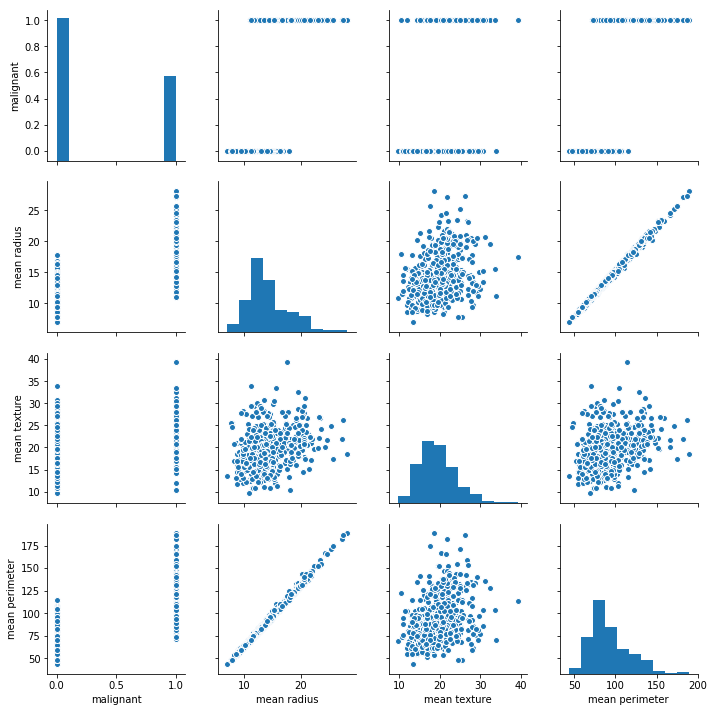

In [38]:
sns.pairplot(df[['malignant','mean radius','mean texture', 'mean perimeter']])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

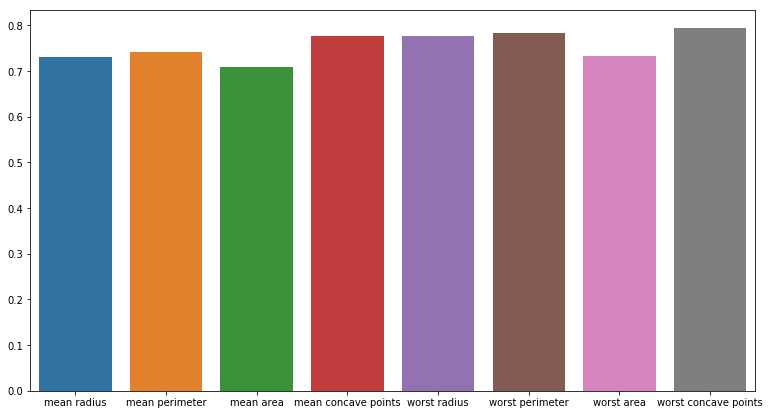

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(13,7))
cor=df.corr()
masked=cor[np.abs(cor['malignant'])>0.7]['malignant']
sns.barplot(x=masked.index[:-1],y=masked.values[:-1])

In [50]:
# 10 largest corr value 
np.abs(cor['malignant']).nlargest(11)

malignant               1.000000
worst concave points    0.793566
worst perimeter         0.782914
mean concave points     0.776614
worst radius            0.776454
mean perimeter          0.742636
worst area              0.733825
mean radius             0.730029
mean area               0.708984
mean concavity          0.696360
worst concavity         0.659610
Name: malignant, dtype: float64

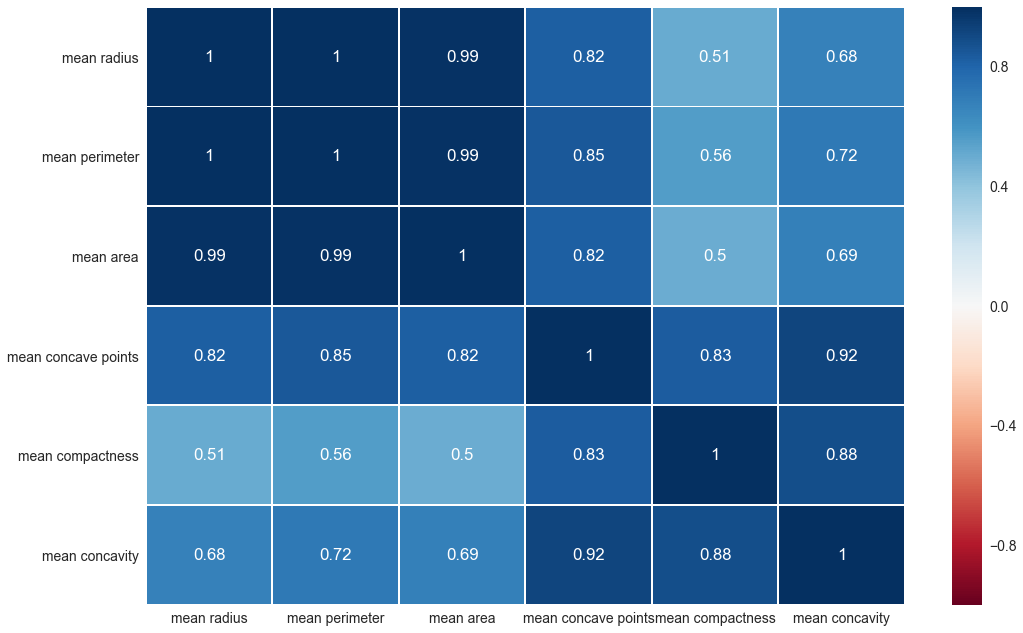

In [55]:
import matplotlib.pyplot as plt

small_df = df[['mean radius', 'mean perimeter', 'mean area', 'mean concave points', 'mean compactness', 'mean concavity']]

fig, axBoston = plt.subplots(figsize = (17,11))
sns.set(font_scale=1.4)
sns.heatmap(small_df.corr(), annot = True, linewidth = 1, vmin = -1, vmax = 1, cmap ="RdBu", ax = axBoston);


In [58]:
from sklearn.linear_model import LogisticRegression

In [100]:
# step 2: steup a model
model = LogisticRegression(solver="liblinear",random_state=42)

In [101]:
#step 3: treat the data 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

scaler = StandardScaler()
X = df.drop(['malignant'], axis=1)
y = df.malignant
Xstd_train = scaler.fit_transform(X_train)
Xstd_test = scaler.transform(X_test)

In [103]:
#step 4: 
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [104]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9577464788732394, 0.958041958041958)

In [105]:
#step 4: fine-tune the hyperparameters
#the important prarmeter is the penalty ( we can use the lasso and rigde )
#C is the strengeth of the reglization like the lambda 
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [106]:
#define wa set of prarmeters to sreach onw
params = {
    'C': np.logspace(-5, 5, 15),
    'penalty': ['l1','l2'],
    'fit_intercept':[True,False]
}

In [107]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(model, 
                  param_grid=params,
                 cv=5,
                 scoring='accuracy',
                 return_train_score= True,
                 verbose=1,
                 ran)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   25.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-05, 5.17947e-05, 2.68270e-04, 1.38950e-03, 7.19686e-03,
       3.72759e-02, 1.93070e-01, 1.00000e+00, 5.17947e+00, 2.68270e+01,
       1.38950e+02, 7.19686e+02, 3.72759e+03, 1.93070e+04, 1.00000e+05]), 'penalty': ['l1', 'l2'], 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [108]:
#best model for logistic 
gs_best = gs.best_estimator_

In [109]:
gs_best

LogisticRegression(C=26.826957952797272, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [111]:
gs.best_score_

0.971830985915493

In [112]:
from sklearn.model_selection import cross_val_score
cross_val_score(gs.best_estimator_, X_train, y_train, cv=5).mean()

0.9717054263565892

In [114]:
gs.score(X_train, y_train)

0.9882629107981221

In [115]:
gs.score(X_test, y_test)

0.965034965034965

In [116]:
gs.best_params_

{'C': 26.826957952797272, 'fit_intercept': True, 'penalty': 'l1'}

In [117]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_fit_intercept,param_penalty,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003096,0.000827,0.000603,0.000125,1e-05,True,l1,"{'C': 1e-05, 'fit_intercept': True, 'penalty':...",0.627907,0.627907,...,0.629108,0.001488,55,0.629412,0.629412,0.629412,0.628655,0.628655,0.629109,0.000371
1,0.002949,0.000374,0.000542,0.000131,1e-05,True,l2,"{'C': 1e-05, 'fit_intercept': True, 'penalty':...",0.953488,0.860465,...,0.899061,0.031363,53,0.888235,0.905882,0.894118,0.906433,0.900585,0.899051,0.006998
2,0.001679,0.000221,0.000425,0.000076,1e-05,False,l1,"{'C': 1e-05, 'fit_intercept': False, 'penalty'...",0.627907,0.627907,...,0.629108,0.001488,55,0.629412,0.629412,0.629412,0.628655,0.628655,0.629109,0.000371
3,0.002144,0.000074,0.000371,0.000005,1e-05,False,l2,"{'C': 1e-05, 'fit_intercept': False, 'penalty'...",0.953488,0.860465,...,0.899061,0.031363,53,0.888235,0.905882,0.894118,0.906433,0.900585,0.899051,0.006998
4,0.001726,0.000089,0.000390,0.000025,5.17947e-05,True,l1,"{'C': 5.1794746792312125e-05, 'fit_intercept':...",0.372093,0.372093,...,0.370892,0.001488,59,0.370588,0.370588,0.370588,0.371345,0.371345,0.370891,0.000371
5,0.002563,0.000150,0.000458,0.000103,5.17947e-05,True,l2,"{'C': 5.1794746792312125e-05, 'fit_intercept':...",0.965116,0.872093,...,0.908451,0.034755,51,0.894118,0.920588,0.902941,0.912281,0.909357,0.907857,0.008909
6,0.001922,0.000131,0.000419,0.000017,5.17947e-05,False,l1,"{'C': 5.1794746792312125e-05, 'fit_intercept':...",0.372093,0.372093,...,0.370892,0.001488,59,0.370588,0.370588,0.370588,0.371345,0.371345,0.370891,0.000371
7,0.003173,0.000574,0.000693,0.000147,5.17947e-05,False,l2,"{'C': 5.1794746792312125e-05, 'fit_intercept':...",0.965116,0.872093,...,0.908451,0.034755,51,0.894118,0.920588,0.902941,0.912281,0.909357,0.907857,0.008909
8,0.005242,0.000929,0.000705,0.000167,0.00026827,True,l1,"{'C': 0.0002682695795279727, 'fit_intercept': ...",0.395349,0.593023,...,0.530516,0.131674,57,0.373529,0.597059,0.570588,0.409357,0.678363,0.525779,0.115849
9,0.003548,0.001072,0.000568,0.000206,0.00026827,True,l2,"{'C': 0.0002682695795279727, 'fit_intercept': ...",0.976744,0.860465,...,0.913146,0.041970,45,0.902941,0.926471,0.911765,0.923977,0.915205,0.916072,0.008513
